Implementar las funciónes de encriptado y decriptado para un texto plano en castellano
(27 letras) para los siguntes métodos (30 puntos)

Cifrado Caesar

In [1]:
def caesar(text,s):
    result = ""

    for i in range(len(text)):
        char = text[i]

        # mayusculas
        if (char.isupper()):
            result += chr((ord(char) + s-65) % 26 + 65)

        # minusculas
        else:
            result += chr((ord(char) + s - 97) % 26 + 97)

    return result

text = "clase"

#shift
s = 4
print ("Texto: " + text)
print ("Cifrado: " + caesar(text,s))

Text  : ATTACKATONCE
Shift : 4
Cipher: EXXEGOEXSRGI


Cifrado afín

In [ ]:

def egcd(a, b):
	x,y, u,v = 0,1, 1,0
	while a != 0:
		q, r = b//a, b%a
		m, n = x-u*q, y-v*q
		b,a, x,y, u,v = a,r, u,v, m,n
	gcd = b
	return gcd, x, y

def modinv(a, m):
	gcd, x, y = egcd(a, m)
	if gcd != 1:
		return None 
	else:
		return x % m


def affine_encrypt(text, key):
	'''
	C = (a*P + b) % 26
	'''
	return ''.join([ chr((( key[0]*(ord(t) - ord('A')) + key[1] ) % 26) 
				+ ord('A')) for t in text.upper().replace(' ', '') ])


text = 'clase'
key = [17, 20]


affine_encrypted_text = affine_encrypt(text, key)

print('Encriptado: {}'.format( affine_encrypted_text ))


Cifrado Vigenére

In [ ]:
def generate_key(msg, key):
    key = list(key)
    if len(msg) == len(key):
        return key
    else:
        for i in range(len(msg) - len(key)):
            key.append(key[i % len(key)])
    return "".join(key)

def encrypt_vigenere(msg, key):
    encrypted_text = []
    key = generate_key(msg, key)
    for i in range(len(msg)):
        char = msg[i]
        if char.isupper():
            encrypted_char = chr((ord(char) + ord(key[i]) - 2 * ord('A')) % 26 + ord('A'))
        elif char.islower():
            encrypted_char = chr((ord(char) + ord(key[i]) - 2 * ord('a')) % 26 + ord('a'))
        else:
            encrypted_char = char
        encrypted_text.append(encrypted_char)
    return "".join(encrypted_text)


text_to_encrypt = "clase"
key = "KEY"

encrypted_text = encrypt_vigenere(text_to_encrypt, key)
print(f"Encriptado: {encrypted_text}")


Implementar el uso de funciones para generar un análisis de frecuencia de un texto
plano. (30 puntos)


Distribución de frecuencia de caracteres:
a: 0.1475
b: 0.0000
c: 0.0656
d: 0.0328
e: 0.1967
f: 0.0164
g: 0.0000
h: 0.0000
i: 0.0328
j: 0.0164
k: 0.0000
l: 0.0656
m: 0.0164
n: 0.0492
o: 0.0492
p: 0.0328
q: 0.0000
r: 0.0820
s: 0.0656
t: 0.0656
u: 0.0328
v: 0.0000
w: 0.0000
x: 0.0164
y: 0.0000
z: 0.0164


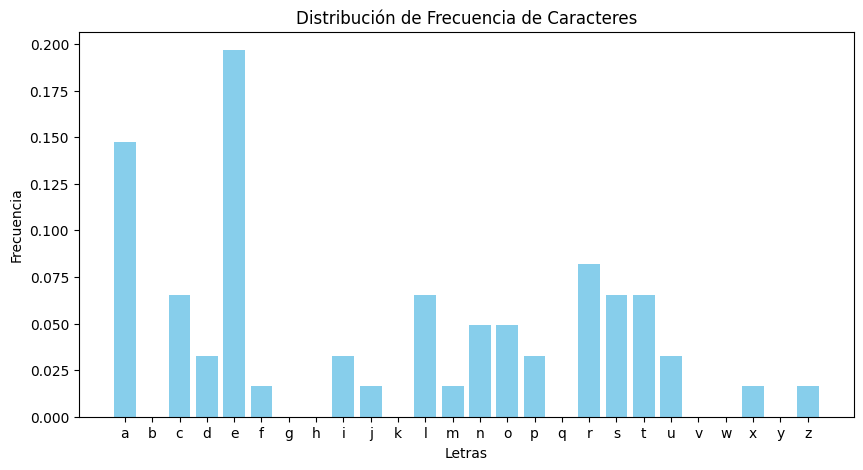

In [2]:
from collections import Counter
import string
import matplotlib.pyplot as plt

def calcular_frecuencia(texto):
    """
    Calcula la distribución de frecuencia de los caracteres en un texto dado.
    """
    # Convertir a minúsculas y filtrar solo letras
    texto = texto.lower()
    letras = [c for c in texto if c in string.ascii_lowercase]
    
    # Contar la frecuencia de cada letra
    total_caracteres = len(letras)
    conteo = Counter(letras)
    
    # Calcular probabilidades
    frecuencia = {letra: conteo[letra] / total_caracteres if total_caracteres > 0 else 0 for letra in string.ascii_lowercase}
    
    return frecuencia

def mostrar_frecuencia(frecuencia):
    """
    Muestra la distribución de frecuencia de los caracteres en orden alfabético.
    """
    print("\nDistribución de frecuencia de caracteres:")
    for letra, probabilidad in sorted(frecuencia.items()):
        print(f"{letra}: {probabilidad:.4f}")

def graficar_frecuencia(frecuencia):
    """
    Genera una gráfica de barras para visualizar la distribución de frecuencia de caracteres.
    """
    letras = list(frecuencia.keys())
    probabilidades = list(frecuencia.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(letras, probabilidades, color='skyblue')
    plt.xlabel('Letras')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Frecuencia de Caracteres')
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    texto = "Este es un ejemplo de texto para analizar la frecuencia de los caracteres."
    frecuencia = calcular_frecuencia(texto)
    mostrar_frecuencia(frecuencia)
    graficar_frecuencia(frecuencia)


Implementar una función para comparar la distribución encontrada contra la
distribución teórica de las letras del castellanos. (40 puntos)


Comparación de frecuencias:
a: Observada = 14.75% | Teórica = 12.53%
b: Observada = 0.00% | Teórica = 1.42%
c: Observada = 6.56% | Teórica = 4.68%
d: Observada = 3.28% | Teórica = 5.86%
e: Observada = 19.67% | Teórica = 13.68%
f: Observada = 1.64% | Teórica = 0.69%
g: Observada = 0.00% | Teórica = 1.01%
h: Observada = 0.00% | Teórica = 0.70%
i: Observada = 3.28% | Teórica = 6.25%
j: Observada = 1.64% | Teórica = 0.44%
k: Observada = 0.00% | Teórica = 0.02%
l: Observada = 6.56% | Teórica = 4.97%
m: Observada = 1.64% | Teórica = 3.15%
n: Observada = 4.92% | Teórica = 6.71%
o: Observada = 4.92% | Teórica = 8.68%
p: Observada = 3.28% | Teórica = 2.51%
q: Observada = 0.00% | Teórica = 0.88%
r: Observada = 8.20% | Teórica = 6.87%
s: Observada = 6.56% | Teórica = 7.98%
t: Observada = 6.56% | Teórica = 4.63%
u: Observada = 3.28% | Teórica = 3.93%
v: Observada = 0.00% | Teórica = 0.90%
w: Observada = 0.00% | Teórica = 0.02%
x: Observada = 1.64% | Teórica = 0.22%
y: Observada = 0.00% | Teórica 

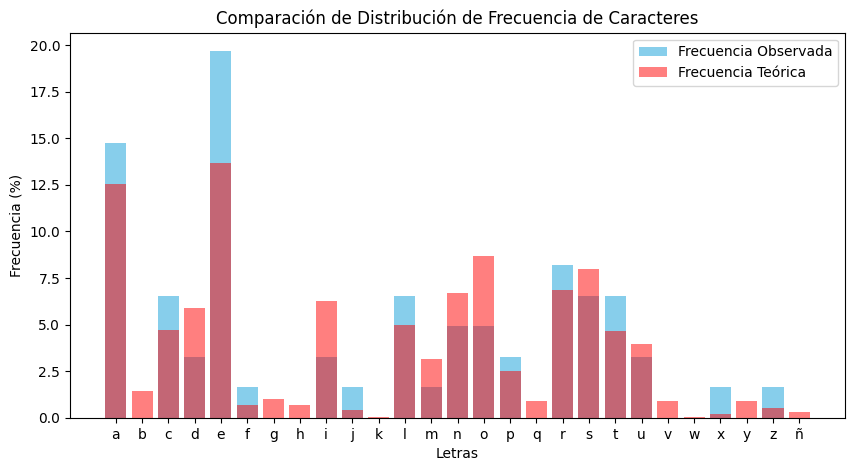

In [7]:
distribucion_teorica = {
    'a': 12.53, 'b': 1.42, 'c': 4.68, 'd': 5.86, 'e': 13.68, 'f': 0.69, 'g': 1.01, 'h': 0.70, 'i': 6.25,
    'j': 0.44, 'k': 0.02, 'l': 4.97, 'm': 3.15, 'n': 6.71, 'ñ': 0.31, 'o': 8.68, 'p': 2.51, 'q': 0.88,
    'r': 6.87, 's': 7.98, 't': 4.63, 'u': 3.93, 'v': 0.90, 'w': 0.02, 'x': 0.22, 'y': 0.90, 'z': 0.52
}

def calcular_frecuencia(texto):
    """
    Calcula la distribución de frecuencia de los caracteres en un texto dado.
    """
    # Convertir a minúsculas y filtrar solo letras
    texto = texto.lower()
    letras = [c for c in texto if c in string.ascii_lowercase]
    
    # Contar la frecuencia de cada letra
    total_caracteres = len(letras)
    conteo = Counter(letras)
    
    # Calcular probabilidades
    frecuencia = {letra: (conteo[letra] / total_caracteres * 100) if total_caracteres > 0 else 0 for letra in string.ascii_lowercase}
    
    return frecuencia

def mostrar_frecuencia(frecuencia):
    """
    Muestra la distribución de frecuencia de los caracteres en orden alfabético.
    """
    print("\nDistribución de frecuencia de caracteres:")
    for letra, probabilidad in sorted(frecuencia.items()):
        print(f"{letra}: {probabilidad:.4f}%")

def graficar_frecuencia(frecuencia):
    """
    Genera una gráfica de barras para visualizar la distribución de frecuencia de caracteres.
    """
    letras = list(frecuencia.keys())
    probabilidades = list(frecuencia.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(letras, probabilidades, color='skyblue', label='Frecuencia Observada')
    plt.bar(distribucion_teorica.keys(), distribucion_teorica.values(), alpha=0.5, color='red', label='Frecuencia Teórica')
    plt.xlabel('Letras')
    plt.ylabel('Frecuencia (%)')
    plt.title('Comparación de Distribución de Frecuencia de Caracteres')
    plt.legend()
    plt.show()

def comparar_frecuencia(frecuencia):
    """
    Compara la distribución encontrada contra la distribución teórica del castellano.
    """
    print("\nComparación de frecuencias:")
    for letra in sorted(distribucion_teorica.keys()):
        observada = frecuencia.get(letra, 0)
        teorica = distribucion_teorica[letra]
        print(f"{letra}: Observada = {observada:.2f}% | Teórica = {teorica:.2f}%")

# Ejemplo de uso
if __name__ == "__main__":
    texto = "Este es un ejemplo de texto para analizar la frecuencia de los caracteres."
    frecuencia = calcular_frecuencia(texto)
    # mostrar_frecuencia(frecuencia)
    comparar_frecuencia(frecuencia)
    graficar_frecuencia(frecuencia)


Referencias

https://www.geeksforgeeks.org/caesar-cipher-in-cryptography/

https://www.geeksforgeeks.org/vigenere-cipher/

https://www.geeksforgeeks.org/implementation-affine-cipher/

https://chatgpt.com/share/679c1374-a34c-8005-8443-6f2d02b404fc